In [1]:
# Inspiration of this comes from
# - https://github.com/Neumi/3D_water_depth_logger

In [1]:
from helpers import read_xyz
%matplotlib widget

# imports for plotting and triangulation
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.tri as tri
from pykrige.ok import OrdinaryKriging
import math

class DepthMap:
    def __init__(self, filename):
        self.filename = filename
        self.x, self.y, self.z = read_xyz(filename)

    def see_range(self, range):
        fig, ax = plt.subplots()
        ax.plot(self.x, self.y, 'ko', ms=0.5)
        ax.plot(self.x[range[0]:range[1]], self.y[range[0]:range[1]], 'ro', ms=0.5)

    def select_range(self,range):
        self.x = self.x[range[0]:range[1]]
        self.y = self.y[range[0]:range[1]]
        self.z = self.z[range[0]:range[1]]
    
    def set_grid(self, npts):
        self.latmin = min(self.x)
        self.latmax = max(self.x)
        self.lonmin = min(self.y)
        self.lonmax = max(self.y)

        self.xi = np.linspace(self.latmin, self.latmax, npts)
        self.yi = np.linspace(self.lonmin, self.lonmax, npts)
       
    def linear_interpolation(self):
        Xi, Yi = np.meshgrid(self.xi, self.yi)
        triang = tri.Triangulation(self.x, self.y)
        interpolator = tri.LinearTriInterpolator(triang, self.z)
        zi = interpolator(Xi, Yi)
        return zi
        
    def kriging_interpolation(self):
        uk = OrdinaryKriging(depthmap1.x, depthmap1.y, depthmap1.z, variogram_model="linear")
        zi, ss = uk.execute("grid", self.xi, self.yi)
        return zi
        
    def plot_interpolation(self, zi):
        fig, ax = plt.subplots()
        ax.contour(self.xi, self.yi, zi, levels=20, linewidths=0.2, colors='k')
        cntr1 = ax.contourf(self.xi, self.yi, zi, levels=20, cmap="gist_rainbow")  # RdBu_r

        fig.colorbar(cntr1, ax=ax, orientation="horizontal").set_label("Depth in m")
        ax.plot(self.x, self.y, 'ko', ms=0.5)
        ax.set(xlim=(self.latmin, self.latmax), ylim=(self.lonmin, self.lonmax))
        ax.set_title("Depth Map Sample")
        ax.ticklabel_format(useOffset=False)

        #ax.set_aspect(1 / math.cos(math.radians(60.0)))

        plt.savefig("depthmap.png", dpi=220)
        plt.show()

0it [00:00, ?it/s]

In [2]:
depthmap1 = DepthMap('./sample-data-lowrance/Sonar_2021-10-16_13.29.36.sl2')

10503


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
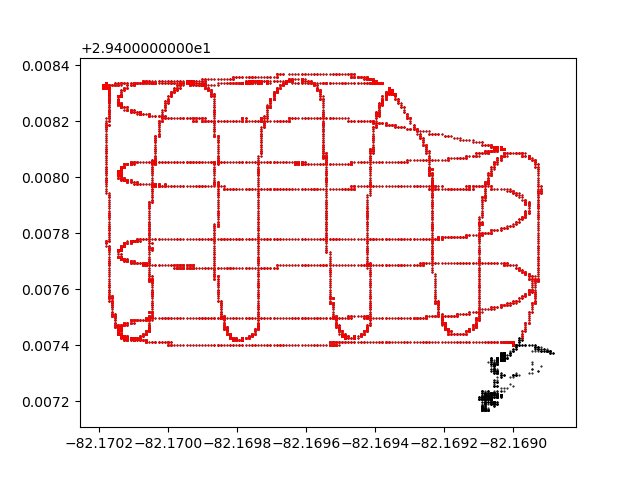

In [3]:
print(len(depthmap1.x))
range = [1500,10100]
depthmap1.see_range(range)
depthmap1.select_range(range)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
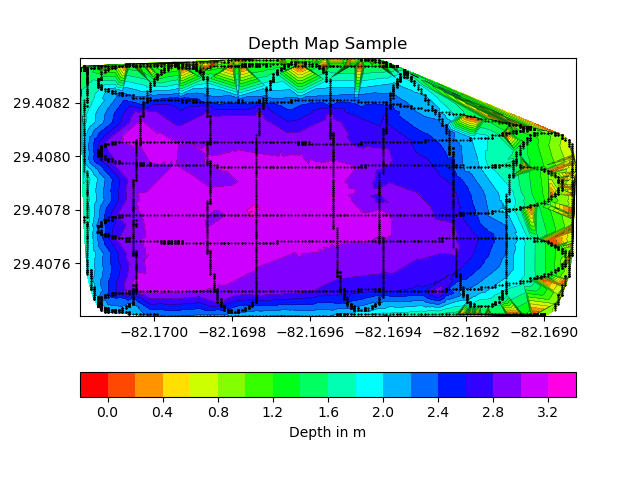

In [5]:
depthmap1.set_grid(npts=len(depthmap1.x))
zi = depthmap1.linear_interpolation()
depthmap1.plot_interpolation(zi)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
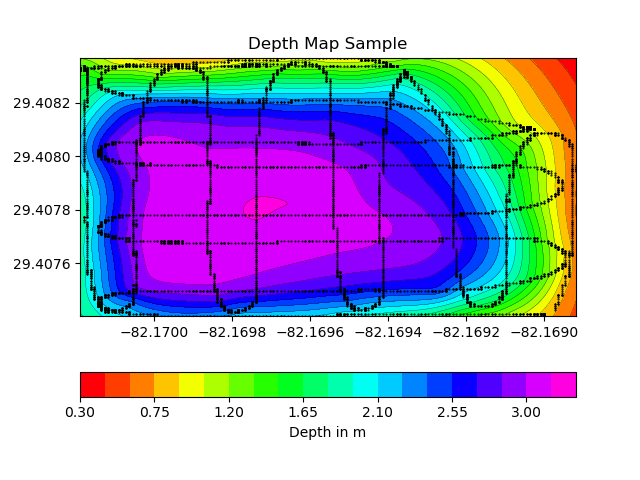

In [4]:
npts = 100
depthmap1.set_grid(npts)
zi = depthmap1.kriging_interpolation() # takes a couple of min 
depthmap1.plot_interpolation(zi)